<a href="https://colab.research.google.com/github/REPANAJYOTHIPRAKASH629/DATA_VISUALIZATION/blob/main/DV_EXP_9_%26_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import folium

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/DATASETS/2019_Census_US_Population_Data.csv')  # Replace 'your_census_dataset.csv' with your dataset path

# Normalize the population estimates for better visualization
max_population = data['POPESTIMATE2019'].max()
data['normalized_population'] = data['POPESTIMATE2019'] / max_population

# Create a map
m = folium.Map(location=[37, -102], zoom_start=4)  # Set the initial center and zoom level

# Add dots to the map for each state
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=3,
        color='blue',  # Change the color as needed
        fill=True,
        fill_color='blue',  # Change the fill color as needed
        fill_opacity=0.5,
        popup=f"State: {row['STATE']}<br>Population: {row['POPESTIMATE2019']}"
    ).add_to(m)

# Show the map
m


In [3]:
import pandas as pd
import folium

data = pd.read_csv('/content/drive/MyDrive/DATASETS/2019_Census_US_Population_Data.csv')

max_population = data['POPESTIMATE2019'].max()
data['normalized_population'] = data['POPESTIMATE2019'] / max_population

m = folium.Map(location=[37, -102], zoom_start=5)
for idx, row in data.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=2,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.5,
        popup=f"State: {row['STATE']}<br>Population: {row['POPESTIMATE2019']}"
    ).add_to(m)
m


In [6]:
#EXP-10
!pip install geoplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 73.7 MB/s eta 0:00:00


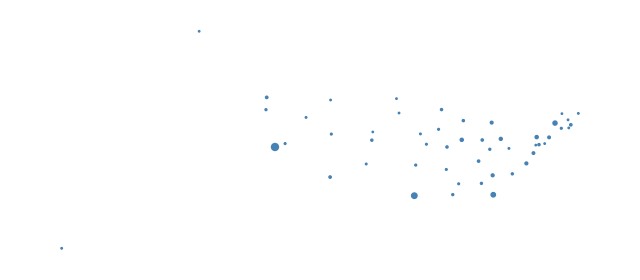

In [7]:
import geopandas as gpd
import geoplot as gplt
import matplotlib.pyplot as plt
import pandas as pd
import folium

# Assuming 'lat' and 'long' columns contain latitude and longitude information
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.long, data.lat))

# Load your dataset, assuming it's in a DataFrame named 'data'
data = pd.read_csv('/content/drive/MyDrive/DATASETS/2019_Census_US_Population_Data.csv')

# Plotting a dot density map
gplt.pointplot(gdf, scale='POPESTIMATE2019', limits=(1, 5))
plt.show()

<ipython-input-8-73502ede8b26>:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


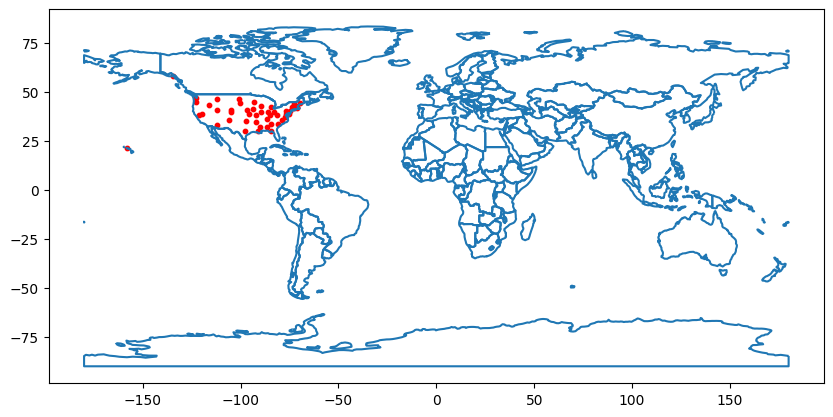

In [8]:
#Generate a Spatial Graph
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.boundary.plot(figsize=(10, 5))
gdf.plot(ax=ax, color='red', markersize=10)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'shape'
  cset = contour_func(


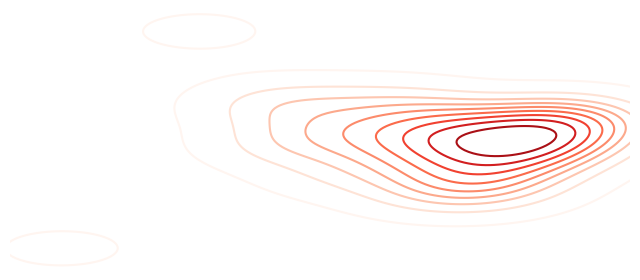

In [9]:
gplt.kdeplot(gdf, cmap = 'Reds', shape = True)
plt.show()

In [10]:
# Creating a heatmap using Folium
m = folium.Map(location=[gdf['lat'].mean(), gdf['long'].mean()], zoom_start=4)
from folium.plugins import HeatMap
heat_data = [[row['lat'], row['long']] for index, row in gdf.iterrows()]
HeatMap(heat_data).add_to(m)
m
